# SEA4001W - P4 - Final assignment 
## Ethan Smith - SMTETH005 - 18 March 

## Data description

The dataset contains the climatological monthly means of satellite-derived chlorophyll concentration for the world ocean at 4 km resolution. Ocean Colour Climate Change Initiative dataset, Version 5.0, European Space Agency, available online at [http://www.esa-oceancolour-cci.org](http://www.esa-oceancolour-cci.org). The data were generated as part of the Ocean Colour component of the European Space Agency Climate Change Initiative project by the Plymouth Marine Laboratory. The files are monthly composites of merged sensor products: NASA SeaWiFS  L1A and L2 R2018.0 LAC and GAC, MODIS-Aqua L1A and L2 R2018.0, MERIS L1B 3rd reprocessing inc OCL corrections, NASA VIIRS L1A and L2 R2018.0, OLCI L1B. The climatology is from 01/01/1998 to 31/01/2020. 

### References

1. **xarray**  for netCDF data management and plotting  
Hoyer, S., & Hamman, J. (2017). xarray: N-D labeled arrays and datasets in Python. *Journal of Open Research Software, 5*(1), 10. [https://doi.org/10.5334/jors.148](https://doi.org/10.5334/jors.148)  

2. **NumPy**  for computation and data management  
Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). Array programming with NumPy. *Nature, 585*(7825), 357-362. [https://doi.org/10.1038/s41586-020-2649-2](https://doi.org/10.1038/s41586-020-2649-2)  

3. **pandas**  for computation and data management  
McKinney, W. (2010). Data Structures for Statistical Computing in Python. *Proceedings of the 9th Python in Science Conference*, 51-56. [https://doi.org/10.25080/Majora-92bf1922-00a](https://doi.org/10.25080/Majora-92bf1922-00a)  

4. **Matplotlib** for plotting  
Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. *Computing in Science & Engineering, 9*(3), 90-95. [https://doi.org/10.1109/MCSE.2007.55](https://doi.org/10.1109/MCSE.2007.55)  

5. **Cartopy**  for plotting  
Met Office. (2010 - Present). Cartopy: A library providing cartographic tools for Python. [https://scitools.org.uk/cartopy/docs/latest/](https://scitools.org.uk/cartopy/docs/latest/)  

6. **cmocean**  for adding features to plots  
Thyng, K. M., Greene, C. A., Hetland, R. D., Zimmerle, H. M., & DiMarco, S. F. (2016). True colors of oceanography: Guidelines for effective and accurate colormap selection. *Oceanography, 29*(3), 9-13. [https://doi.org/10.5670/oceanog.2016.66](https://doi.org/10.5670/oceanog.2016.66)  

7. **Geopy**  for plotting  
Geopy contributors. (2008 - Present). Geopy: Geocoding library for Python. [https://geopy.readthedocs.io/en/stable/](https://geopy.readthedocs.io/en/stable/)  

8. **time (Python Standard Library)**  used to manage data download timeouts  
Python Software Foundation. (2024). The Python Standard Library - `time`. [https://docs.python.org/3/library/time.html](https://docs.python.org/3/library/time.html)  

9. **Spyder**  used as an IDE for Python  
Raybaut, P. (2009). Spyder: The Scientific Python Development Environment. [https://www.spyder-ide.org/](https://www.spyder-ide.org/)  

10. **Python**  used as the primary programming language  
Python Software Foundation. (2025). Python 3.12.9 (packaged by Anaconda, Inc.). [https://www.python.org/](https://www.python.org/)  

11. **IPython**  for an enhanced interactive Python experience  
Pérez, F., & Granger, B. E. (2007). IPython: A system for interactive scientific computing. *Computing in Science & Engineering, 9*(3), 21-29. [https://doi.org/10.1109/MCSE.2007.53](https://doi.org/10.1109/MCSE.2007.53)  

12. **Anaconda**  for managing Python environments and packages  
Anaconda, Inc. (2025). Anaconda Distribution. [https://www.anaconda.com/](https://www.anaconda.com/)  

13. **ChatGPT**  for assistance in generating code and documentation  
OpenAI. (2024). ChatGPT: Language model for text-based AI assistance. [https://openai.com/chatgpt](https://openai.com/chatgpt)  

### Introduction to the southern West Coast and its bathymetry.

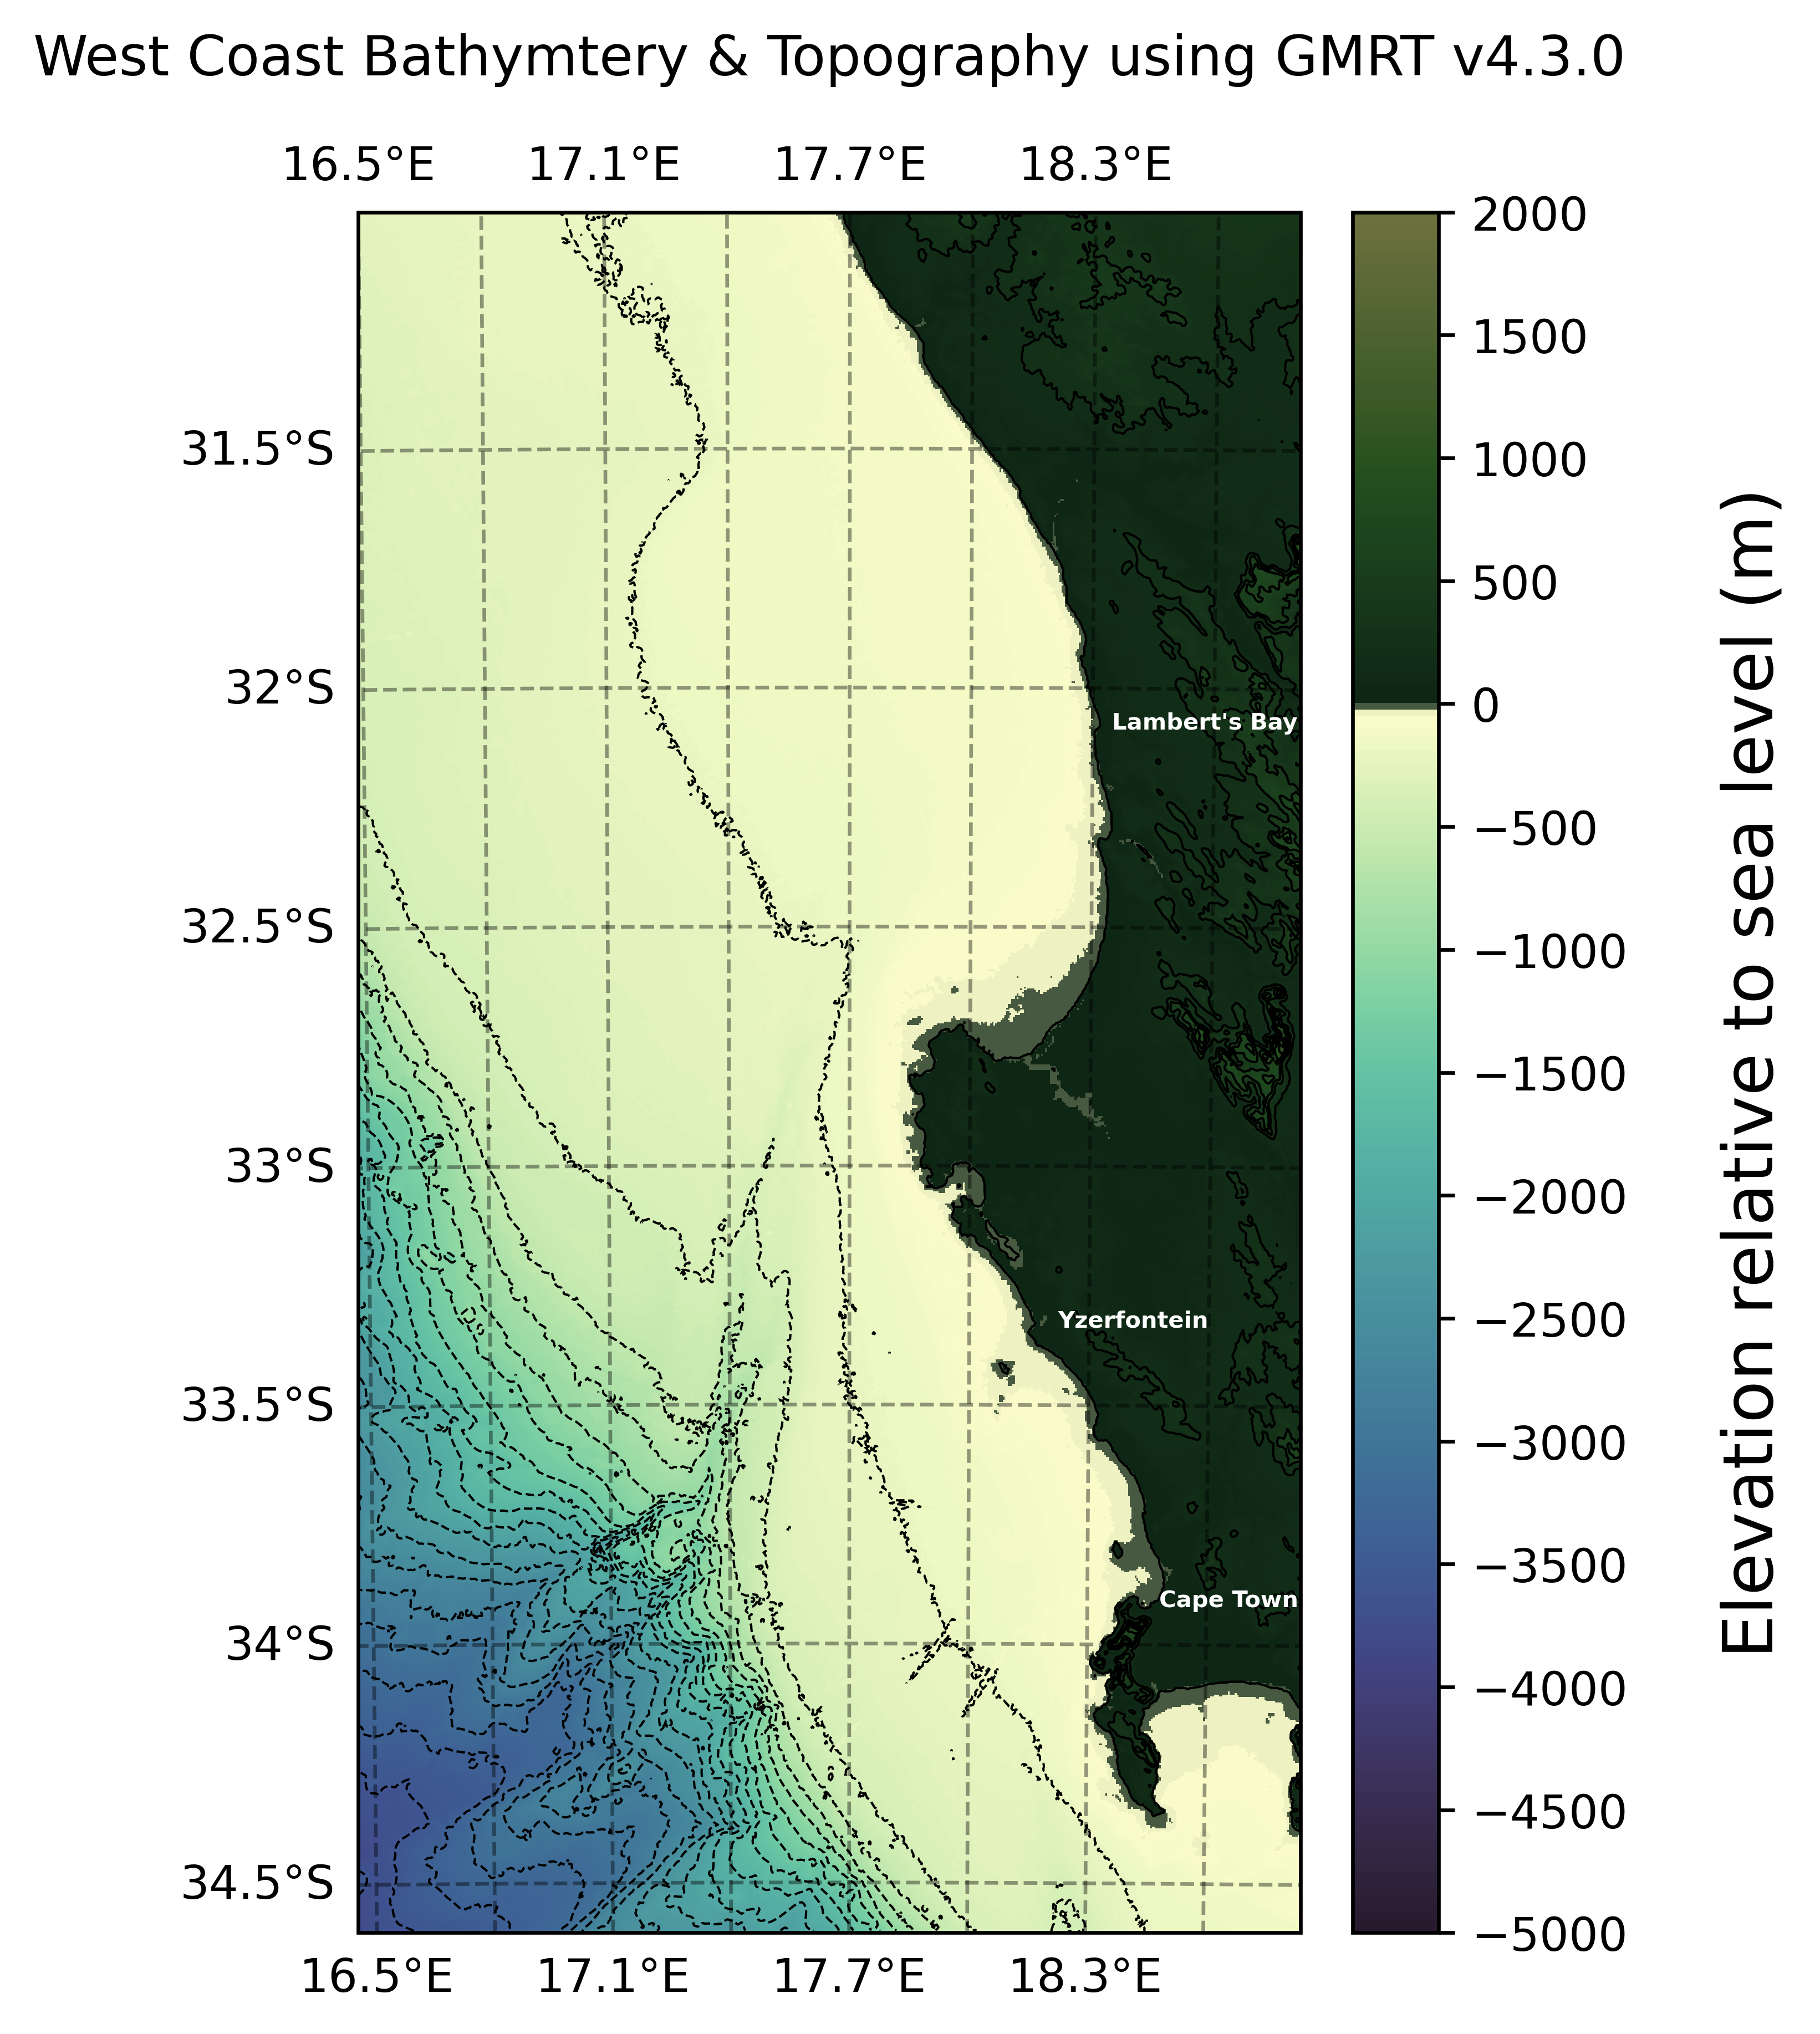

In [31]:
# =============================================================================
# Ethan Smith SMTETH005 
# SEA4001W P4 plot 1 - regional topography & bathymetry
# =============================================================================

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean
from geopy.geocoders import Nominatim
import time

# Load the Global Multi-Resolution Topography (GMRT) Synthesis grid file as a xarray DataSet 
ds = xr.open_dataset('GMRTv4_3_0_20250318topo (1).grd')

# Extract data that I am going to use to plot bathymetry and land topography
lon = ds['lon']  # Longitude 
lat = ds['lat']  # Latitude
elevation = ds['altitude']  # Bathymetry (negative values) and altitude (positive values)

# Define map extent
extent = [16.5, 18.8, -34.6, -31]  # (lon_min, lon_max, lat_min, lat_max)
central_lon = np.mean(extent[:2]) # Used to centre the map 
central_lat = np.mean(extent[2:])

# Set the range for both the colourmap and colourbar 
vmin = -5000
vmax = 2000
pivot = 0 # This centers the colourbar and map on zero (where land begins)

# Crop the colourmapto the range above 
cmap = cmocean.tools.crop(cmocean.cm.topo, vmin, vmax, pivot)

# Plot the map
plt.figure(figsize=(12, 6), dpi = 600, layout = 'constrained') # Constrained layout to display colourbar correctly 
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Plot the bathymetry with the cropped colourmap
pcm = ax.pcolormesh(lon, lat, elevation, cmap = cmap, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())

# Add contours to the map
ax.contour(lon, lat, elevation, levels=30, colors="black", linewidths=0.5, transform=ccrs.PlateCarree())

# Format gridlines 
gl = ax.gridlines(draw_labels=True, linestyle='--', color='k', alpha=0.4)  # Create a gridline object to modify  
gl.right_labels = False  # Remove the right labels to avoid overlap with the colourbar

# Add colourbar with custom ticks
cbar = plt.colorbar(pcm, ax=ax, orientation='vertical', pad = 0.015) # move the colourbar closer to the plot (left)
cbar.set_ticks(np.linspace(vmin, vmax, num=15))  # Custom ticks from -5000 to 2000 meters 
cbar.ax.tick_params(labelsize=10)  # Adjust the tick label size
cbar.set_label('Elevation relative to sea level (m)', labelpad=20, fontsize = 15)  # Increase the fontsize and move the label to the right 

# Title
plt.title("West Coast Bathymtery & Topography using GMRT v4.3.0", fontsize=12, ha='center', pad=15) # Increase the title size, centre it over the plot and the colourbar and increase its distance from the plot

# Define offsets for each label (longitude shift, latitude shift): shift each label slighly to the right 
label_offsets = {
    'Lambert\'s Bay': (0.27, 0),
    'Cape Town': (0.24, 0),
    'Yzerfontein': (0.25, 0)
}

# Add locatons to the map for reference - Initialise the geolocator 
geolocator = Nominatim(user_agent='educational')

# Define locations for the geolocator
places = ['Lambert\'s Bay', 'Cape Town', 'Yzerfontein']

# Get addresses (store only longitude, latitude, name)
addresses = []
for p in places:
    try:
        loc = geolocator.geocode(p, language="en")
        if loc and loc.longitude and loc.latitude:
            addresses.append((loc.longitude, loc.latitude, p))  # Store as tuple (lon, lat, name)
        else:
            print(f"Skipping location (not found): {p}")
    except Exception as e:
        print(f"Error retrieving {p}: {e}")
    time.sleep(1)  # Avoid rate limits

# Plot labels for locations retrieved using geolocator
for lon, lat, name in addresses:
    # Apply individual label offsets
    offset_lon, offset_lat = label_offsets.get(name, (0, 0))  
    ax.text(lon + offset_lon, lat + offset_lat, name, transform=ccrs.PlateCarree(), 
            fontsize=5, color='white', ha='center', va='bottom', weight ='bold' )  
    
# Show plot
plt.show()

I decided to investigate this region because I have a love for both False Bay and the West Coast. I have explored the western dive sites of False Bay as a divemaster, witnessing both cold, crystal-clear months and warm, murky ones. I want to investigate the general distribution of phytoplankton by using surface chlorophyll-a concentrations derived by remotely sensed ocean colour data. 

The figure above illustrates the bathymetry and topography for a section of the South African coastline from False Bay, up the west coast, to just past the Northern Cape provincial border. The continental shelf is narrow toward the southern extent of the region and widens considerably past the Cape Canyon off Yzerfontein. The Benguela Current flows northward off the west coast of South Africa and forms the 
 eastern portion of the South Atlantic Gyre. The Benguela Upwelling System is inshore of the major current and is driven by coastal winds blowing such that surface waters are transported offshore, which are then replaced by nutrient-rich deep water. The occurrence and intensity of the upwelling are dependent on wind & the underlying bathymetry, therefore the upwelling occurs in 'pulses' when conditions are favourable and at specific cells where deep water can make it to the surface. Features that 'cut' into the continental shelf, like the Cape Canyon, provide a path of least resistance for deep waters to flow through. Upwelling mostly occurs in these sorts of regions. 

## West Coast Climatological Annual Mean Chlorophyll-a Concentration (1998-2020)

In [34]:
# Import the necessary packages
import xarray as xr
import numpy as np
import cartopy.crs as ccrs

# Load the chlorophyll dataset 
ds = xr.open_dataset("./ESACCI-OC-MAPPED-CLIMATOLOGY-1M_MONTHLY_4km_PML_CHL-fv5.0.nc") # DataSet that is not loaded in 

# Check the structure
ds

# Create a DataArray containing the chlorophyll variable 
da_chlor_a = ds['chlor_a'] # DataArray with values loaded 

# View dimensions and coordinates
# da_chlor_a.dims
# da_chlor_a.coords

# View some of the values for chlorophyll
# da_chlor_a.values

# Check for min, max, and mean values of the DataArray to confirm data range
print(da_chlor_a.min(), da_chlor_a.max(), da_chlor_a.mean())

<xarray.DataArray 'chlor_a' ()>
array(0.001) <xarray.DataArray 'chlor_a' ()>
array(99.48895264) <xarray.DataArray 'chlor_a' ()>
array(0.40058345, dtype=float32)


In [35]:
# Store the means of chlor_a in da_chlor_a_mean
da_chlor_a_mean = da_chlor_a.mean(dim='time') 

#print(da_chlor_a_mean) # in the output you can see that the time dimension has been stripped. 

# Check for min, max, and mean values of the DataArray to confirm data range
print(da_chlor_a_mean.min(), da_chlor_a_mean.max(), da_chlor_a_mean.mean())

<xarray.DataArray 'chlor_a' ()>
array(0.001) <xarray.DataArray 'chlor_a' ()>
array(93.51422119) <xarray.DataArray 'chlor_a' ()>
array(0.49266133, dtype=float32)


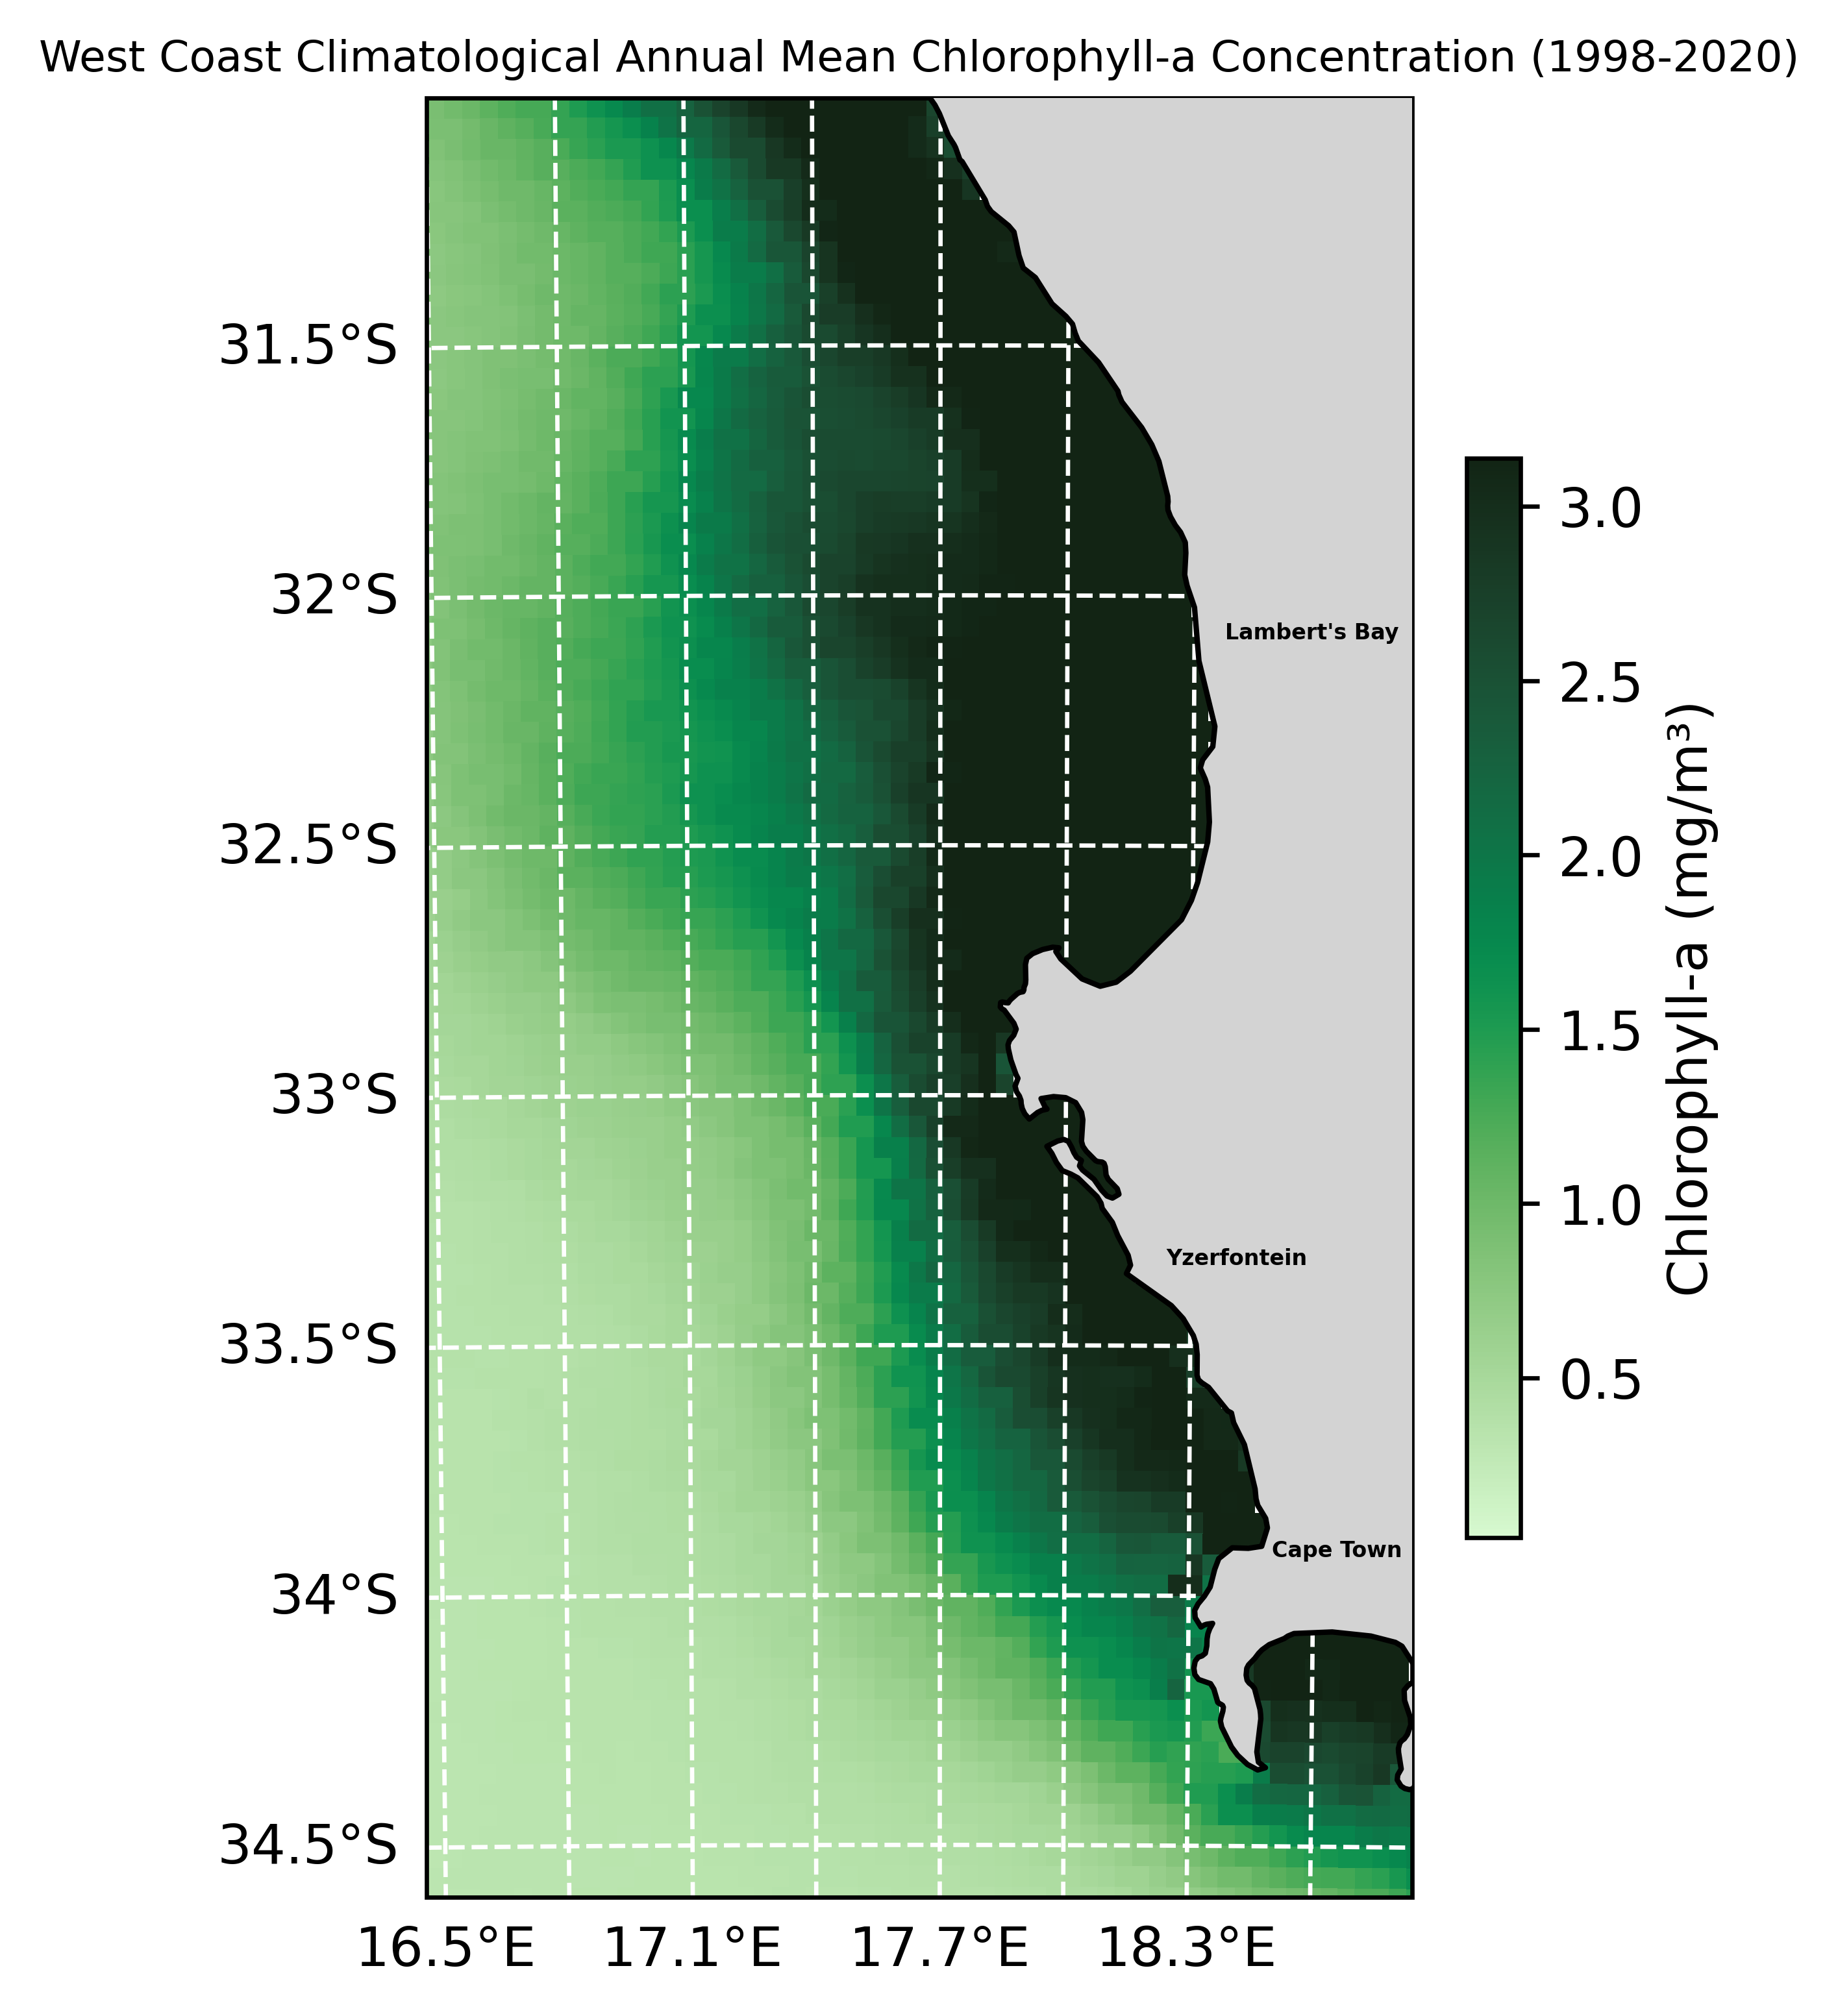

In [36]:
# =============================================================================
# Ethan Smith SMTETH005 
# SEA4001W P4 plot 2 - West Coast Climatological Annual Mean Chlorophyll-a Concentration (1998-2020)
# =============================================================================

import numpy as np
import cartopy.feature as cfeature
import cmocean
from geopy.geocoders import Nominatim
import time

# Define map extent
extent = [16.5, 18.8, -34.6, -31]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

# Mask NaNs to avoid plotting errors
da_chlor_a_mean_masked = da_chlor_a_mean.where(~np.isnan(da_chlor_a_mean))


# Create the figure and axis 
fig, ax = plt.subplots(figsize=(12, 6), dpi = 600, subplot_kw={'projection': ccrs.Orthographic(central_lon, central_lat)})
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Plot the masked chlorophyll data 
im = da_chlor_a_mean_masked.plot(ax=ax, transform=ccrs.PlateCarree(),
                                 add_colorbar=False, robust=True, cmap=cmocean.cm.algae, zorder = 2)

# Create a cbar manually so that I can adjust the position: 
cbar = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.6, pad=0.015)
cbar.set_label('Chlorophyll-a (mg/m³)')

# Title
plt.title("West Coast Climatological Annual Mean Chlorophyll-a Concentration (1998-2020)", fontsize=8, ha='center', pad=5) # Increase the title size, centre it over the plot and the colourbar and increase its distance from the plot

# Define offsets for each label (longitude shift, latitude shift): shift each label slighly to the right 
label_offsets = {
    'Lambert\'s Bay': (0.27, 0),
    'Cape Town': (0.24, 0),
    'Yzerfontein': (0.25, 0)
}

# Add locatons to the map for reference - Initialise the geolocator 
geolocator = Nominatim(user_agent='educational')

# Define locations for the geolocator
places = ['Lambert\'s Bay', 'Cape Town', 'Yzerfontein']

# Get addresses (store only longitude, latitude, name)
addresses = []
for p in places:
    try:
        loc = geolocator.geocode(p, language="en", timeout = 10)
        if loc and loc.longitude and loc.latitude:
            addresses.append((loc.longitude, loc.latitude, p))  # Store as tuple (lon, lat, name)
        else:
            print(f"Skipping location (not found): {p}")
    except Exception as e:
        print(f"Error retrieving {p}: {e}")
    time.sleep(10)  # Avoid rate limits

# Plot labels for locations retrieved using geolocator 
for lon, lat, name in addresses:
    # Apply individual label offsets
    offset_lon, offset_lat = label_offsets.get(name, (0, 0))  
    ax.text(lon + offset_lon, lat + offset_lat, name, transform=ccrs.PlateCarree(), 
            fontsize=4, color='black', ha='center', va='bottom', weight ='bold', zorder = 10)  

# Add coastlines and gridlines
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray', zorder = 5)
gl = ax.gridlines(draw_labels=True, linestyle='--', color='white', alpha=1, zorder = 15)  
gl.right_labels = False
gl.top_labels = False

The plot above shows the climatological annual mean chlorophyll-a concentration of my region for the period from 1998-2020. The average concentration in the region ranges from 0 to just above 3 mg/m³ of chlorophyll-a. The concentrations are highest near the coast, and this is to be expected in a strong eastern-boundary upwelling system. There has been substantial primary production in this coastal region during the last 20 years. This primary production is important in fueling local and neighbouring marine-ecosystems. 

## Log transforming the chlorophyll data for the next plot.

In [39]:
import xarray as xr

# Define my region
lat_min, lat_max = -34.6, -31
lon_min, lon_max = 16.5, 18.8

# Load the dataset
ds = xr.open_dataset("./ESACCI-OC-MAPPED-CLIMATOLOGY-1M_MONTHLY_4km_PML_CHL-fv5.0.nc")

# Create and add  a log-transformed chlorophyll variable and add it to the DataSet
ds['log_chlor_a'] = np.log(da_chlor_a) # make a new entry in the DataSet

# Copy the attributes from the elevation variable
ds['log_chlor_a'].attrs = ds['chlor_a'].attrs.copy()

# Modify specific attributes for the chlorophyll variable
ds['log_chlor_a'].attrs['standard_name'] = 'log_transformed_mass_concentration_of_chlorophyll_a_in_sea_water'  
ds['log_chlor_a'].attrs['long_name'] = 'Chlorophyll-a concentration in seawater (log-transformed), generated by as a blended combination of OCI, OCI2, OC2 and OCx algorithms, depending on water class memberships'

# Subset the dataset to my region
ds_subset = ds.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))

# Access chlorophyll-a DataArray 
da_log_monthly_mean_chlor_a = ds_subset['log_chlor_a']  # No need to compute the mean again

# Define month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Assign month names to the time coordinate
da_log_monthly_mean_chlor_a = da_log_monthly_mean_chlor_a.assign_coords(time=month_names)

# Print the result
# print(da_log_monthly_mean_chlor_a)
print(da_log_monthly_mean_chlor_a.min(), da_log_monthly_mean_chlor_a.max(), da_log_monthly_mean_chlor_a.mean())

<xarray.DataArray 'log_chlor_a' ()>
array(-1.593961) <xarray.DataArray 'log_chlor_a' ()>
array(3.02369547) <xarray.DataArray 'log_chlor_a' ()>
array(0.22810446, dtype=float32)


## Climatological Monthly Mean Log Chlorophyll-a Concentration (1998-2020)

Text(0.5, 1.04, 'Climatological Monthly Mean Log Chlorophyll-a Concentration (1998-2020)')

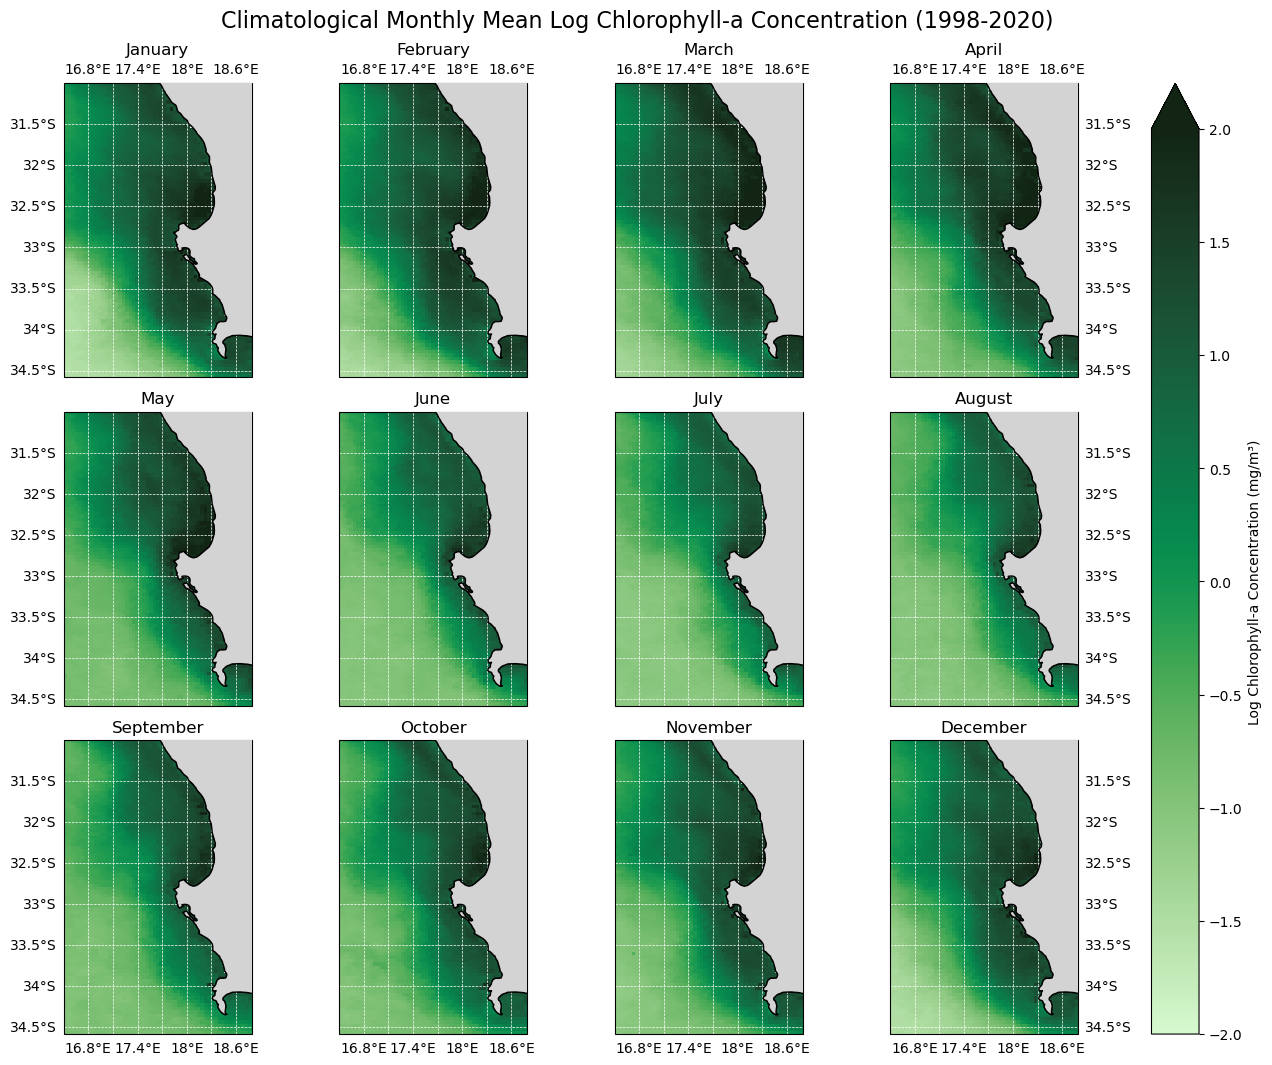

In [41]:
# =============================================================================
# Ethan Smith SMTETH005 
# SEA4001W P4 plot 3 - Climatological Monthly Mean Log Chlorophyll-a Concentration (1998-2020)
# =============================================================================

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import pandas as pd

# Set number of rows and columns to give 12 subplots 
n_rows, n_cols = 3, 4  

# Create a faceted plot using xarray, the 'time' coordinate of the DataArray is used to create subplots 
fg = da_log_monthly_mean_chlor_a.plot(
    col="time", col_wrap=n_cols, cmap=cmocean.cm.algae, 
    vmin=-2, vmax=2, figsize=(15, 10),
    subplot_kws={"projection": ccrs.PlateCarree()}, # apply the projection to each subplot - make life easier and use plate carree 
    cbar_kwargs={"label": "Log Chlorophyll-a Concentration (mg/m³)"}
)

# Extract month names from time coordinate by converting each time value to a pandas timestamp and formatting it
month_names = [pd.Timestamp(t.item()).strftime("%B") for t in da_log_monthly_mean_chlor_a.time.values]

# Set custom titles (only month names)
for ax, month in zip(fg.axs.flat, month_names):
    ax.set_title(month, fontsize=12)

# Add features to each subplot
for i, ax in enumerate(fg.axs.flat):
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray', zorder=5)

    # Add gridlines
    gl = ax.gridlines(draw_labels=True, color='white', linestyle='--', linewidth=0.5)

    # Label latitudes on the leftmost and rightmost columns
    gl.left_labels = (i % n_cols == 0)  # Left column
    gl.right_labels = (i % n_cols == n_cols - 1)  # Right column

    # Label longitudes on the top and bottom rows
    gl.top_labels = (i < n_cols)  # Top row
    gl.bottom_labels = (i >= (n_rows - 1) * n_cols)  # Bottom row

plt.suptitle("Climatological Monthly Mean Log Chlorophyll-a Concentration (1998-2020)", fontsize=16, y=1.04) # move the title a up a little 

The plot above represents the climatological (1998-2020) monthly means with of the log- transformed chlorophyll-a concentration data. I decided to log-transform the data for this illustration because the range was actual range was between 0 and 21 mg/m³ and the mean was around 1.8 mg/m³. This caused issues with the colourmaps which were solved by log-transforming the data. Seasonality is evident in this region, with peak productivity in summer and reduced productivity in winter. This is due to the seasonal wind-driven upwelling along the west coast.During summer, south-easterly winds drive offshore Ekman transport, displacing surface waters and bringing cold, nutrient-rich deeper waters to the surface. In winter, winds weaken and reverse to north-easterlies, reducing upwelling. However, weaker thermoclines and storm-induced mixing still entrain nutrients into surface waters. The result of this is a productive system year round. 

## Timeseries showing the mean seasonal cycle of the whole region compared with timeseries of a single grid point. 

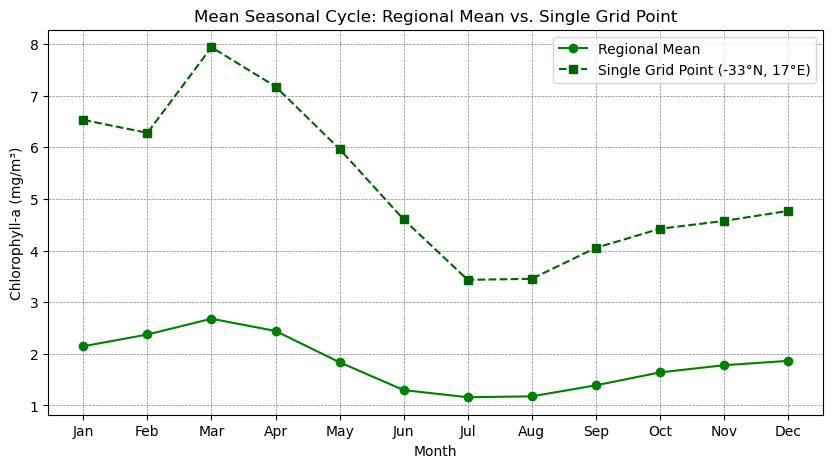

In [44]:
# =============================================================================
# Ethan Smith SMTETH005 
# SEA4001W P4 plot 4 - Climatological Monthly Mean Log Chlorophyll-a Concentration (1998-2020)
# =============================================================================

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Define my region
lat_min, lat_max = -34.6, -31
lon_min, lon_max = 16.5, 18.8

# Load the dataset
ds = xr.open_dataset("./ESACCI-OC-MAPPED-CLIMATOLOGY-1M_MONTHLY_4km_PML_CHL-fv5.0.nc")

# Subset the dataset to my region
ds_subset = ds.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))

# Access chlorophyll-a DataArray 
da_monthly_mean_chlor_a = ds_subset['chlor_a']  

# Compute the mean seasonal cycle over the entire region
da_region_mean = da_monthly_mean_chlor_a.mean(dim=["lat", "lon"])

# Select a single grid point (nearest available lat/lon in the subset)
single_point = da_monthly_mean_chlor_a.sel(lat=-32.5, lon=18, method="nearest")

# Define month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Assign month names to the time coordinate
da_region_mean = da_region_mean.assign_coords(time=month_names)
single_point = single_point.assign_coords(time=month_names)

# Plot the timeseries
plt.figure(figsize=(10, 5))
plt.plot(month_names, da_region_mean, marker='o', linestyle='-', label="Regional Mean", color = 'green')
plt.plot(month_names, single_point, marker='s', linestyle='--', label="Single Grid Point (-33°N, 17°E)", color = 'darkgreen')

# Customize plot
plt.xlabel("Month")
plt.ylabel("Chlorophyll-a (mg/m³)")
plt.title("Mean Seasonal Cycle: Regional Mean vs. Single Grid Point")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

The timeseries above shows the mean seasonal variation of the region, and of a single point near Cape Columbine which shows relatively high chlorophyll-a concentrations year round.The trend of this single point tracks that of the region as a whole, with higher concentrations of chlorophyll-a throughout the year. This plot clearly shows the seasonal cycle that I mentioned in the previous plots' discussion. From 1998 to 2020, March has exhibited the highest chlorophyll-a concentrations for the entire region as well as my selected point. July has shown the lowest chlorophyll-a concentrations for the past twenty years for both the region and the single point. 